## 准备数据

In [7]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or any {'0', '1', '2'}

def mnist_dataset():
    (x, y), (x_test, y_test) = datasets.mnist.load_data()
    #normalize
    x = x/255.0
    x_test = x_test/255.0
    
    return (x, y), (x_test, y_test)

In [8]:
print(list(zip([1, 2, 3, 4], ['a', 'b', 'c', 'd'])))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]


## 建立模型

In [9]:
class myModel:
    def __init__(self):
        ####################
        '''声明模型对应的参数'''
        self.W1 = tf.Variable(tf.random.normal(shape=[28*28, 100]))
        self.W2 = tf.Variable(tf.random.normal(shape=[100, 10]))
        self.b1 = tf.Variable(tf.ones(shape=[100]))
        self.b2 = tf.Variable(tf.ones(shape=[10]))
        ####################
    def __call__(self, x):
        ####################
        '''实现模型函数体，返回未归一化的logits'''
        x = tf.reshape(x, shape=[-1, 28*28])
        h1 = tf.matmul(x, self.W1) + self.b1
        logits = tf.matmul(h1, self.W2) + self.b2
        ####################
        return logits
        
model = myModel()

optimizer = optimizers.Adam()

## 计算 loss

In [10]:
@tf.function
def compute_loss(logits, labels):
    return tf.reduce_mean(
        tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=labels))

@tf.function
def compute_accuracy(logits, labels):
    predictions = tf.argmax(logits, axis=1)
    return tf.reduce_mean(tf.cast(tf.equal(predictions, labels), tf.float32))

@tf.function
def train_one_step(model, optimizer, x, y):
    with tf.GradientTape() as tape:
        logits = model(x)
        loss = compute_loss(logits, y)

    # compute gradient
    trainable_vars = [model.W1, model.W2, model.b1, model.b2]
    grads = tape.gradient(loss, trainable_vars)
    for g, v in zip(grads, trainable_vars):
        v.assign_sub(0.01*g)

    accuracy = compute_accuracy(logits, y)

    # loss and accuracy is scalar tensor
    return loss, accuracy

@tf.function
def test(model, x, y):
    logits = model(x)
    loss = compute_loss(logits, y)
    accuracy = compute_accuracy(logits, y)
    return loss, accuracy

## 实际训练

In [11]:
train_data, test_data = mnist_dataset()
for epoch in range(50):
    loss, accuracy = train_one_step(model, optimizer, 
                                    tf.constant(train_data[0], dtype=tf.float32), 
                                    tf.constant(train_data[1], dtype=tf.int64))
    print('epoch', epoch, ': loss', loss.numpy(), '; accuracy', accuracy.numpy())
loss, accuracy = test(model, 
                      tf.constant(test_data[0], dtype=tf.float32), 
                      tf.constant(test_data[1], dtype=tf.int64))

print('test loss', loss.numpy(), '; accuracy', accuracy.numpy())

epoch 0 : loss 128.36313 ; accuracy 0.0755
epoch 1 : loss 121.7312 ; accuracy 0.07726666
epoch 2 : loss 115.95704 ; accuracy 0.08096667
epoch 3 : loss 110.82457 ; accuracy 0.085433334
epoch 4 : loss 106.18277 ; accuracy 0.09128334
epoch 5 : loss 101.944244 ; accuracy 0.09715
epoch 6 : loss 98.038445 ; accuracy 0.10281666
epoch 7 : loss 94.41411 ; accuracy 0.10925
epoch 8 : loss 91.03971 ; accuracy 0.11568333
epoch 9 : loss 87.891335 ; accuracy 0.12313333
epoch 10 : loss 84.944855 ; accuracy 0.13088334
epoch 11 : loss 82.17687 ; accuracy 0.13771667
epoch 12 : loss 79.56819 ; accuracy 0.1457
epoch 13 : loss 77.10513 ; accuracy 0.15416667
epoch 14 : loss 74.77931 ; accuracy 0.16285
epoch 15 : loss 72.57911 ; accuracy 0.17193334
epoch 16 : loss 70.49521 ; accuracy 0.18071666
epoch 17 : loss 68.51539 ; accuracy 0.1899
epoch 18 : loss 66.63158 ; accuracy 0.19901666
epoch 19 : loss 64.838806 ; accuracy 0.20793334
epoch 20 : loss 63.132336 ; accuracy 0.21755
epoch 21 : loss 61.511566 ; accurac

## 两层ReLU网络拟合自定义函数

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU

Epoch 1/100
32/32 [==============================] - 0s 935us/step - loss: 4.7936
Epoch 2/100
32/32 [==============================] - 0s 871us/step - loss: 3.0687
Epoch 3/100
32/32 [==============================] - 0s 774us/step - loss: 2.9850
Epoch 4/100
32/32 [==============================] - 0s 774us/step - loss: 2.9275
Epoch 5/100
32/32 [==============================] - 0s 774us/step - loss: 2.8478
Epoch 6/100
32/32 [==============================] - 0s 742us/step - loss: 2.7408
Epoch 7/100
32/32 [==============================] - 0s 774us/step - loss: 2.6492
Epoch 8/100
32/32 [==============================] - 0s 774us/step - loss: 2.5839
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 2.4664
Epoch 10/100
32/32 [==============================] - 0s 774us/step - loss: 2.3860
Epoch 11/100
32/32 [==============================] - 0s 774us/step - loss: 2.2766
Epoch 12/100
32/32 [==============================] - 0s 742us/step - loss: 2.1653
Epoch 13/100
32

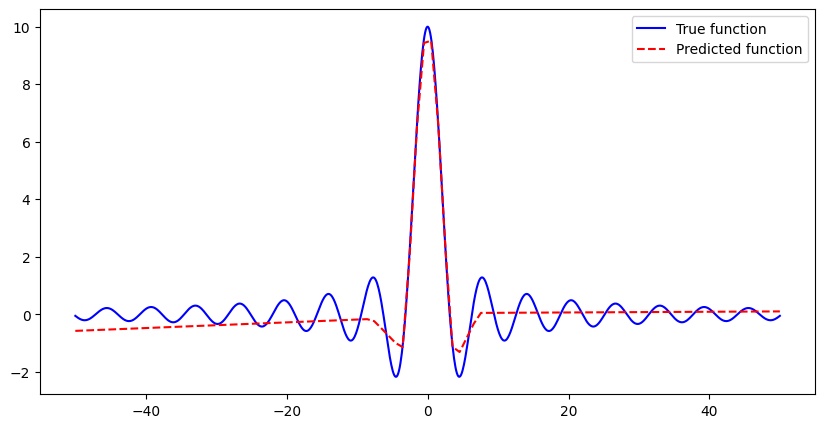

In [13]:
# 目标函数
def target_function(x):
    return 10*np.sin(x)/x

x_train = np.linspace(-50, 50, 1000).reshape(-1, 1)
y_train = target_function(x_train)

model = Sequential([
    Dense(50, input_shape=(1,)),  # 输入层
    ReLU(),  # 激活函数
    Dense(50),  # 隐藏层
    ReLU(),  # 激活函数
    Dense(1)  # 输出层
])
optimizer = optimizers.Adam()

model.compile(loss='mse')
model.fit(x_train, y_train, epochs=100)
x_test = np.linspace(-50, 50, 100).reshape(-1, 1)
y_pred = model.predict(x_test)

# 绘制
plt.figure(figsize=(10, 5))
plt.plot(x_train, target_function(x_train), label='True function', color='blue')
plt.plot(x_test, y_pred, label='Predicted function', color='red', linestyle='--')

plt.legend()
plt.show()